In [2]:
#install praw 
!pip install praw

In [1]:
import praw
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\USER\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
#user_agent="Scraper 1.0 by /u/python_engineer"
reddit= praw.Reddit(
    client_id="waynXfbIaGZa1L49yPT3jQ",
    client_secret="ocfSyZ92xFuDyPiZjQl7GWDdJ1qzBQ",
    user_agent="Example"
)

In [4]:
headlines=set()
for sub in reddit.subreddit('time').hot(limit=None):
    headlines.add(sub.title)

In [5]:
print(headlines)

{'Time-Lapse | dandelion faded seeds', 'Time is not an illusion. It’s an object with physical size | Aeon Essays', 'Reason why the ability to stop time is terrible', 'If you think about it !', 'Metabolic Process and time… if u stand on side a black hole or approach light speed time will slow down for you. So my question is will the metabolic processes that make us age know that we are on side of a black hole or approaching light speed?', 'Ferrofluid Clock- Basically, the clock manipulates ferrofluid–a magnetic liquid first discovered by NASA scientists in the 1960s–with magnets to display patterns on a clock.', 'Why Do We Have Leap Years with Paul Sutter', 'Celestial Astrology In Modern Times', 'My foot imprint on my shoe', 'Time passing', 'time-themed podcast recommendations', 'Which looks better>', 'An effective time management strategy for business success', '2.2.22 2:22:22', 'The Race for Nuclear Time – Scientists Make Important Advance', 'Freaked out about time passing.', 'LoFi 🔴 

In [6]:
df=pd.DataFrame(headlines)
df.head()

,0
0,Time-Lapse | dandelion faded seeds
1,Time is not an illusion. It’s an object with p...
2,Reason why the ability to stop time is terrible
3,If you think about it !
4,Metabolic Process and time… if u stand on side...


In [7]:
#Exporting Data to a CSV File:
df.to_csv('reddit_csv.csv',header=False, encoding='utf-8', index=False)

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia=SIA()
results=[]

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Time-Lapse | dandelion faded seeds',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Time is not an illusion. It’s an object with physical size | Aeon Essays',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.4588,
  'headline': 'Reason why the ability to stop time is terrible',
  'neg': 0.39,
  'neu': 0.441,
  'pos': 0.169}]


In [9]:
df=pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.00,1.000,0.000,0.0000,Time-Lapse | dandelion faded seeds
1,0.00,1.000,0.000,0.0000,Time is not an illusion. It’s an object with p...
2,0.39,0.441,0.169,-0.4588,Reason why the ability to stop time is terrible
3,0.00,1.000,0.000,0.0000,If you think about it !
4,0.00,1.000,0.000,0.0000,Metabolic Process and time… if u stand on side...


In [10]:
df['label']='neutral'
df.loc[df['compound'] > 0.2, 'label'] = 'positive'
df.loc[df['compound'] < -0.2, 'label'] = 'negative'
df.head()

,neg,neu,pos,compound,headline,label
0,0.00,1.000,0.000,0.0000,Time-Lapse | dandelion faded seeds,neutral
1,0.00,1.000,0.000,0.0000,Time is not an illusion. It’s an object with p...,neutral
2,0.39,0.441,0.169,-0.4588,Reason why the ability to stop time is terrible,negative
3,0.00,1.000,0.000,0.0000,If you think about it !,neutral
4,0.00,1.000,0.000,0.0000,Metabolic Process and time… if u stand on side...,neutral


In [11]:
df2 = df[['headline','label']]

In [12]:
df2=df2[df2.label != 'neutral']

In [13]:
df2.to_csv('reddit_data.csv' , encoding='utf-8' , index=False)

In [14]:
df2.label.value_counts()

positive    165
negative    113
Name: label, dtype: int64

In [15]:
df2.label.value_counts(normalize=True) * 100

positive    59.352518
negative    40.647482
Name: label, dtype: float64

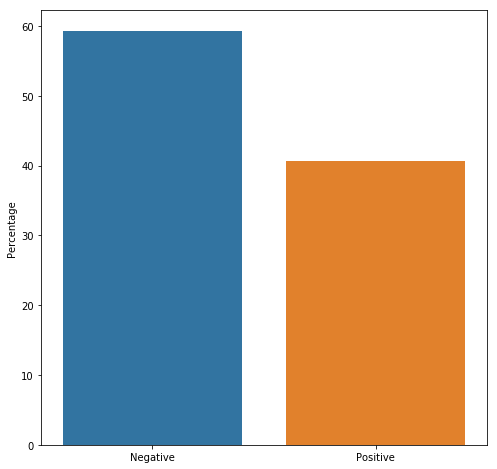

In [18]:
fig, ax= plt.subplots(figsize=(8,8))
counts=df2.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()